In [1]:
## importing the library files
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the data
Data=pd.read_csv('Suicidedataset.csv')
Data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
Data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
Data.shape

(27820, 12)

In [6]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [7]:
Data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
Data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [9]:
### missing values
Data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [10]:
### removing the missing values 
Data['HDI for year'].fillna(Data['HDI for year'].median(),inplace=True)


# Section A

In [11]:
### 1 How many categorical variables does the data contain? Please state the number of categories for each such variable.

cat_var=Data.select_dtypes(include=['object']).copy()
cat_var.columns


Index(['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ',
       'generation'],
      dtype='object')

In [12]:
print('The Total num of categories in country are:',Data['country'].value_counts().count())
print('The Total num of categories in sex are:',Data['sex'].value_counts().count())
print('The Total num of categories in age are:',Data['age'].value_counts().count())
print('The Total num of categories in country_year are:',Data['country-year'].value_counts().count())
print('The Total num of categories in gdp_for_year ($):',Data[' gdp_for_year ($) '].value_counts().count())
print('The Total num of categories in generation:',Data['generation'].value_counts().count())

The Total num of categories in country are: 101
The Total num of categories in sex are: 2
The Total num of categories in age are: 6
The Total num of categories in country_year are: 2321
The Total num of categories in gdp_for_year ($): 2321
The Total num of categories in generation: 6


In [13]:
#### 2 How strong is the correlation between HDI and suicides_no?
Data['HDI for year'].corr(Data['suicides_no'])

0.06322369872438843

In [14]:
### 3 Which generation has the highest number of suicides/100k pop?
Data['suicides/100k pop'].max()

224.97

In [15]:
### 4 Which country has the least number of suicides between 1990-1995?
Data['suicides_no'].min()

0

# Section B

In [16]:
### Are there any countries with no suicides recorded?  Create a new data frame which ranks these countries by HDI.

d2=Data[Data['suicides_no']==0].groupby(['country','HDI for year'])['suicides_no'].count()
print('The total numbers of countries has suicides_no which is zero are:',d2.sum())
d3=pd.DataFrame(d2,columns=['suicides_no'])
d3
## About 4281 country has the suicides_no which is equal to zero

The total numbers of countries has suicides_no which is zero are: 4281


suicides_no
country              HDI for year             
Albania              0.656                   2
                     0.695                  12
                     0.722                   1
                     0.779                  43
Antigua and Barbuda  0.779                 278
                     0.781                  24
                     0.783                  12
Armenia              0.605                   1
                     0.632                   2
                     0.648                   3
                     0.723                   3
                     0.728                   1
                     0.731                   2
                     0.733                   2
                     0.779                  32
Aruba                0.779                 116
Australia            0.779                   1
                     0.865                   1
                     0.882                   1
Austria              0.779                   7
                     0.815                   1
                     0.885                   1
Azerbaijan           0.609                   4
                     0.640                   1
                     0.779                  22
Bahamas              0.774                   5
                     0.778                  16
                     0.779                 164
                     0.780                   8
                     0.783                   9
...                                        ...
Suriname             0.713                   1
                     0.779                  40
Sweden               0.779                   7
Switzerland          0.779                   4
                     0.846                   1
                     0.904                   1
                     0.924                   1
                     0.927                   1
Thailand             0.648                   2
                     0.779                   4
Trinidad and Tobago  0.673                   5
                     0.684                   1
                     0.753                   1
                     0.767                   2
                     0.772                   1
                     0.779                  24
Turkmenistan         0.666                   1
                     0.671                   1
                     0.677                   2
                     0.682                   3
                     0.688                   3
                     0.779                   6
United Arab Emirates 0.779                  17
                     0.822                   5
                     0.828                   3
United Kingdom       0.773                   1
                     0.779                   2
Uruguay              0.711                   1
                     0.779                   8
                     0.793                   1

[390 rows x 1 columns]

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


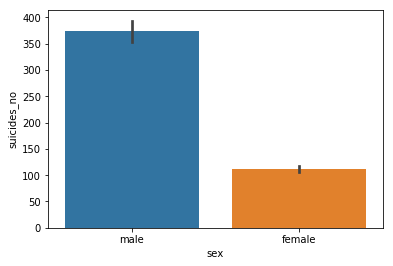

In [20]:
### Generate suitable graphs for comparing suicides between men and women for the top 5 
### countries with the highest suicide rate per 100,000.
import seaborn as sns
sns.barplot(x='sex',y='suicides_no',data=Data)
plt.show()

### Are there any redundant columns in the dataset? Which coulmn is it? Can that column be dropped? State your reasons.
country-year is the redundant column in the dataset because we already have the country and year seperately which again explained in this attribute called country-year
so it can be dropped

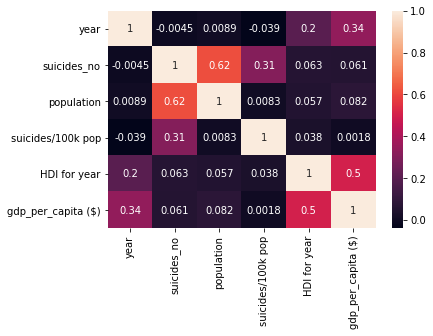

In [22]:
### Generate a correlation heatmap for the dataset. Which pairs of variables are highly correlated.
import seaborn as sns
sns.heatmap(Data.corr(),annot=True)
plt.show()

From the above Heatmap the population and the suicides_no has a higher correlation of about 0.62

# Section C

In [46]:
#### 10.a) a)	A table containing the columns ‘Country’, ‘Year’, ‘Total suicides’. 
### Total Suicides has to be calculated from the existing table.
def srgdep(a):
    return Series(dict(Total_suicides=a['suicides_no'].count()))
srgdep(Data)
d2=Data.groupby(['country','year']).apply(srgdep)
d2=pd.DataFrame(d2)
d2

Total_suicides
country             year                
Albania             1987              12
                    1988              12
                    1989              12
                    1992              12
                    1993              12
                    1994              12
                    1995              12
                    1996              12
                    1997              12
                    1998              12
                    1999              12
                    2000              12
                    2001              12
                    2002              12
                    2003              12
                    2004              12
                    2005              12
                    2006              12
                    2007              12
                    2008              12
                    2009              12
                    2010              12
Antigua and Barbuda 1985              12
                    1986              12
                    1987              12
                    1988              12
                    1989              12
                    1990              12
                    1991              12
                    1992              12
...                                  ...
Uruguay             2007              12
                    2008              12
                    2009              12
                    2010              12
                    2012              12
                    2013              12
                    2014              12
                    2015              12
Uzbekistan          1990              12
                    1991              12
                    1992              12
                    1993              12
                    1994              12
                    1995              12
                    1996              12
                    1997              12
                    1998              12
                    1999              12
                    2000              12
                    2001              12
                    2002              12
                    2003              12
                    2004              12
                    2005              12
                    2009              12
                    2010              12
                    2011              12
                    2012              12
                    2013              12
                    2014              12

[2321 rows x 1 columns]

In [ ]:
### 10.b)	A Table containing the columns ‘Country’, ‘Year’, ‘per capita gdp’.
#d2=pd.DataFrame(Data['country'],Data['year'],Data['gdp_per_capita ($)'])

In [38]:
Data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [42]:
Data1=Data.drop(['sex','age','suicides_no','population','suicides/100k pop','country-year','HDI for year',' gdp_for_year ($) ','generation'],axis=1)
Data1.head()

,country,year,gdp_per_capita ($)
0,Albania,1987,796
1,Albania,1987,796
2,Albania,1987,796
3,Albania,1987,796
4,Albania,1987,796
